Atalov S. (TSI AUCA)

# LAB1: Neural Network with 1 Hidden Layer
---

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import copy

### Load the Dataset

In [10]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

In [12]:
X, Y = load_planar_dataset()

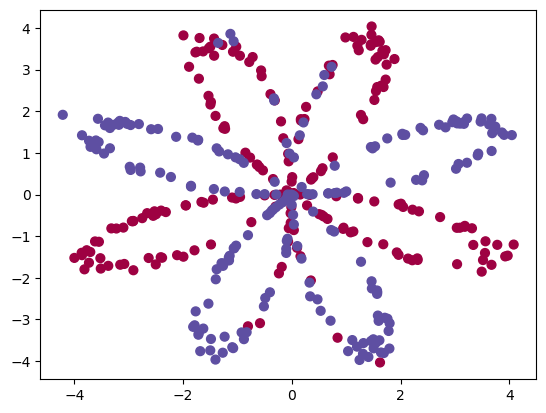

In [14]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

### How many training examples do we have? What is the shape of X and Y?

In [17]:
X.shape

(2, 400)

In [19]:
Y.shape

(1, 400)

---
## Part 1. Classify using the Perceptron Model

In [22]:
A = np.array([
    [1, 2, 3],
    [2, 4, 5]
])

In [24]:
B = np.array([
    [-1, -2, -3],
    [-2, -4, -5]
])

In [26]:
A.shape

(2, 3)

In [28]:
A * B

array([[ -1,  -4,  -9],
       [ -4, -16, -25]])

In [30]:
A.dot(B.T)

array([[-14, -25],
       [-25, -45]])

In [32]:
A @ B.T

array([[-14, -25],
       [-25, -45]])

In [34]:
np.dot(A, B.T)

array([[-14, -25],
       [-25, -45]])

In [36]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def initialize(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b

def forward(w, b, X, Y):
    m = X.shape[1] # number of examples in X
    
    # @ = np.dot()
    # * = not matrix multiplication
    A = 1(w.T@X + b)
    
    cost = - np.sum(Y*np.log(A) + (1-Y)*np.log(1-A)) / m
    
    cost = np.squeeze(np.array(cost))
    
    return A, cost

def backward(A, X, Y):
    m = X.shape[1]
    
    dw = (X@(A-Y).T) / m
    db = np.sum(A-Y) / m
    
    grads = {"dw": dw,
             "db": db}
    
    return grads

def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009):
    
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    costs = []
    
    for i in range(num_iterations):
        
        A, cost = forward(w, b, X, Y)
        grads = backward(A, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

def predict(w, b, X):
    m = X.shape[1]
    
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(w.T@X + b)

    for i in range(A.shape[1]):

        if A[0, i] > 0.5:
            Y_prediction[0, i] = 1
        else:
            Y_prediction[0, i] = 0

    return Y_prediction

def model(X_train, Y_train, num_iterations=2000, learning_rate=0.5):
    
    w, b = initialize(X_train.shape[0])

    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate)

    w = params['w']
    b = params['b']

    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))

    d = {"costs": costs, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [38]:
d = model(X, Y)

train accuracy: 47.0 %


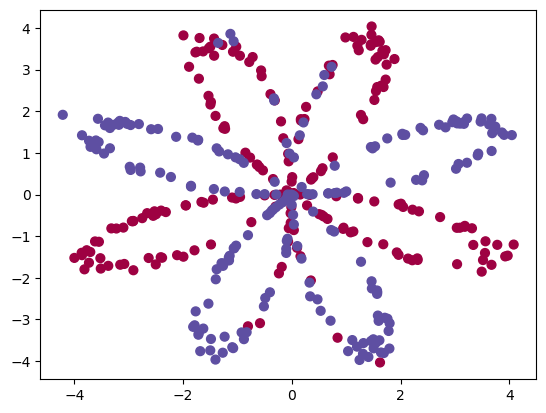

In [40]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

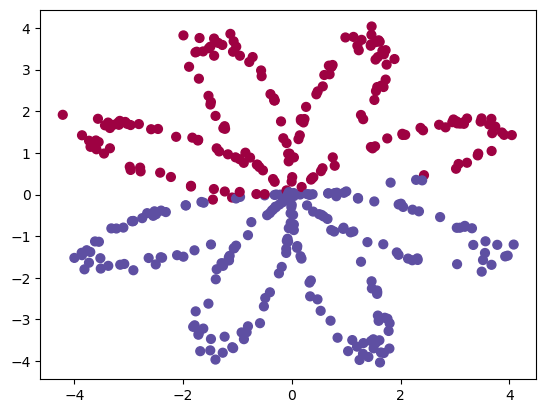

In [42]:
plt.scatter(X[0, :], X[1, :], c=d['Y_prediction_train'], s=40, cmap=plt.cm.Spectral); 

---
## Part 2. Neural Network with 1 Hidden Layer

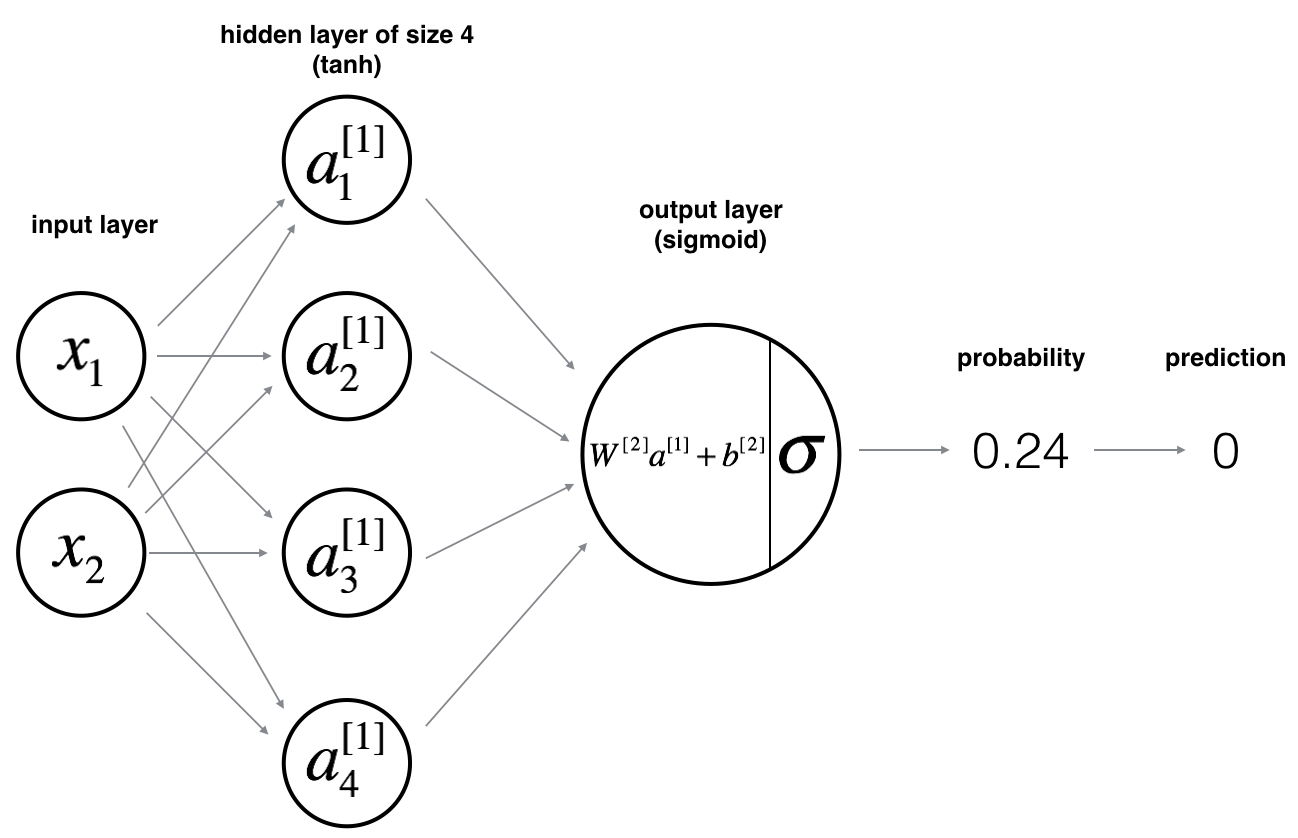

**Mathematically**:

For one example $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

**Reminder**: The general methodology to build a Neural Network is to:
  1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
  2. Initialize the model's parameters
  3. Loop:
        - Implement forward propagation
        - Compute loss
        - Implement backward propagation to get the gradients
        - Update parameters (gradient descent)

### Exercise 1 - layer_sizes 

Define three variables:
   - n_x: the size of the input layer
   - n_h: the size of the hidden layer (**set this to 4, only for this Exercise 1**) 
   - n_y: the size of the output layer

**Hint**: Use shapes of X and Y to find n_x and n_y. Also, hard code the hidden layer size to be 4.

In [53]:
def layer_sizes(X, Y):

    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]

    return (n_x, n_h, n_y)

### Exercise 2 -  initialize_parameters

Implement the function `initialize_parameters()`.

**Instructions**:
- Make sure your parameters' sizes are right. Refer to the neural network figure above if needed.
- You will initialize the weights matrices with random values. 
    - Use: `np.random.randn(a,b) * 0.01` to randomly initialize a matrix of shape (a,b).
- You will initialize the bias vectors as zeros. 
    - Use: `np.zeros((a,b))` to initialize a matrix of shape (a,b) with zeros.

In [58]:
def initialize_parameters(n_x, n_h, n_y):

    # TASK
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))

    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }
    
    
    return parameters

### Exercise 3 - forward_propagation

Implement `forward_propagation()` using the following equations:

$$Z^{[1]} =  W^{[1]} X + b^{[1]}\tag{1}$$ 
$$A^{[1]} = \tanh(Z^{[1]})\tag{2}$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}\tag{3}$$
$$\hat{Y} = A^{[2]} = \sigma(Z^{[2]})\tag{4}$$


**Instructions**:

- Check the mathematical representation of your classifier in the figure above.
- Use the function `sigmoid()`. 
- Use the function `np.tanh()`. 
- Implement using these steps:
    1. Retrieve each parameter from the dictionary "parameters" (which is the output of `initialize_parameters()` by using `parameters[".."]`.
    2. Implement Forward Propagation. Compute $Z^{[1]}, A^{[1]}, Z^{[2]}$ and $A^{[2]}$ (the vector of all your predictions on all the examples in the training set).
- Values needed in the backpropagation are stored in "cache". The cache will be given as an input to the backpropagation function.

In [60]:
def forward_propagation(X, parameters):

    # TASK
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]


    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    

    assert(A2.shape == (1, X.shape[1]))
    

    cache = {
        "Z1": Z1,
        "A1": A1,
        "Z2": Z2,
        "A2": A2
    }
    
    return A2, cache

### Exercise 4 - compute_cost 

Now that you've computed $A^{[2]}$ (in the Python variable "`A2`"), which contains $a^{[2](i)}$ for all examples, you can compute the cost function as follows:

$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$

**Notes**: 

- You can use `np.squeeze()` to remove redundant dimensions (in the case of single float, this will be reduced to a zero-dimension array).


In [62]:
def compute_cost(A2, Y):
    m = Y.shape[1] # number of examples

    cost = - (np.dot(np.log(A2), Y.T) +  np.dot(np.log(1-A2), (1-Y).T))/ m
    
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
    return cost

### Exercise 5 -  backward_propagation

Implement the function `backward_propagation()`.

**Instructions**:
Backpropagation is usually the hardest (most mathematical) part in deep learning. To help you, here again is the slide from the lecture on backpropagation. You'll want to use the six equations on the right of this slide, since you are building a vectorized implementation.  

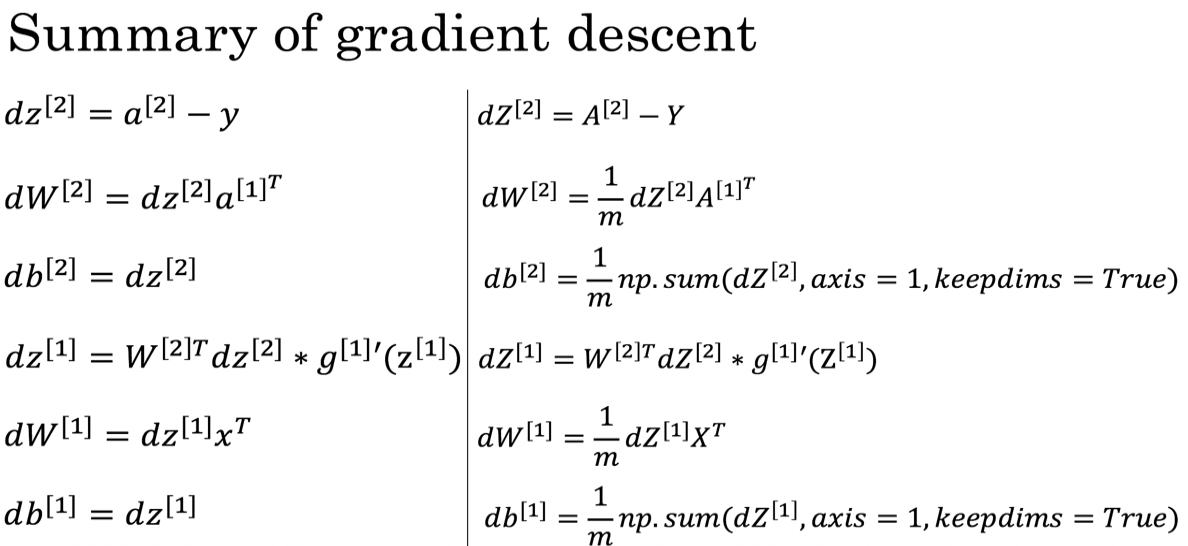

<!--
$\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } = \frac{1}{m} (a^{[2](i)} - y^{(i)})$

$\frac{\partial \mathcal{J} }{ \partial W_2 } = \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } a^{[1] (i) T} $

$\frac{\partial \mathcal{J} }{ \partial b_2 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)}}}$

$\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} } =  W_2^T \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } * ( 1 - a^{[1] (i) 2}) $

$\frac{\partial \mathcal{J} }{ \partial W_1 } = \frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} }  X^T $

$\frac{\partial \mathcal{J} _i }{ \partial b_1 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)}}}$

- Note that $*$ denotes elementwise multiplication.
- The notation you will use is common in deep learning coding:
    - dW1 = $\frac{\partial \mathcal{J} }{ \partial W_1 }$
    - db1 = $\frac{\partial \mathcal{J} }{ \partial b_1 }$
    - dW2 = $\frac{\partial \mathcal{J} }{ \partial W_2 }$
    - db2 = $\frac{\partial \mathcal{J} }{ \partial b_2 }$
    
!-->

- Tips:
    - To compute dZ1 you'll need to compute $g^{[1]'}(Z^{[1]})$. Since $g^{[1]}(.)$ is the tanh activation function, if $a = g^{[1]}(z)$ then $g^{[1]'}(z) = 1-a^2$. So you can compute 
    $g^{[1]'}(Z^{[1]})$ using `(1 - np.power(A1, 2))`.

In [64]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters["W1"]
    W2 = parameters["W2"]

    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # TASK
    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    # Store gradients in a dictionary
    grads = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
    }
    
    return grads

### Exercise 6 - update_parameters

Implement the update rule. Use gradient descent. You have to use (dW1, db1, dW2, db2) in order to update (W1, b1, W2, b2).

In [66]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    parameters = copy.deepcopy(parameters)
    grads = copy.deepcopy(grads)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    # YOUR CODE ENDS HERE
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
     
    # TASK
    # Update rule for each parameter
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

Integrate your functions in `nn_model()` 

### Exercise 7 - nn_model

Build your neural network model in `nn_model()`.

**Instructions**: The neural network model has to use the previous functions in the right order.

In [69]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    parameters = initialize_parameters(n_x, n_h, n_y)
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters) 
        cost = compute_cost(A2, Y)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate=1.2)
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

### Exercise 8 - predict

Predict with your model by building `predict()`.
Use forward propagation to predict results.

**Reminder**: predictions = $y_{prediction} = \mathbb 1 \text{{activation > 0.5}} = \begin{cases}
      1 & \text{if}\ activation > 0.5 \\
      0 & \text{otherwise}
    \end{cases}$  
    
As an example, if you would like to set the entries of a matrix X to 0 and 1 based on a threshold you would do: ```X_new = (X > threshold)```

In [71]:
def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions = A2 > 0.5
    
    return predictions

### FINALLY: Test the Model !!!

In [74]:
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

Cost after iteration 0: 0.693162
Cost after iteration 1000: 0.258625
Cost after iteration 2000: 0.239334
Cost after iteration 3000: 0.230802
Cost after iteration 4000: 0.225528
Cost after iteration 5000: 0.221845
Cost after iteration 6000: 0.219094
Cost after iteration 7000: 0.220632
Cost after iteration 8000: 0.219401
Cost after iteration 9000: 0.218483


### PREDICT:

In [77]:
parameters

{'W1': array([[ 11.45645053,  -3.41757671],
        [  0.15517044,  -9.70669163],
        [ 11.49913151,  13.45148077],
        [  9.25824414, -10.19686117]]),
 'b1': array([[0.41165286],
        [0.01607712],
        [0.06460287],
        [0.01510852]]),
 'W2': array([[ -3.45780355, -11.99231447,  -6.12427836,  10.56852363]]),
 'b2': array([[-0.06762062]])}

In [79]:
y_hat = predict(parameters, X)

### RESULTS:

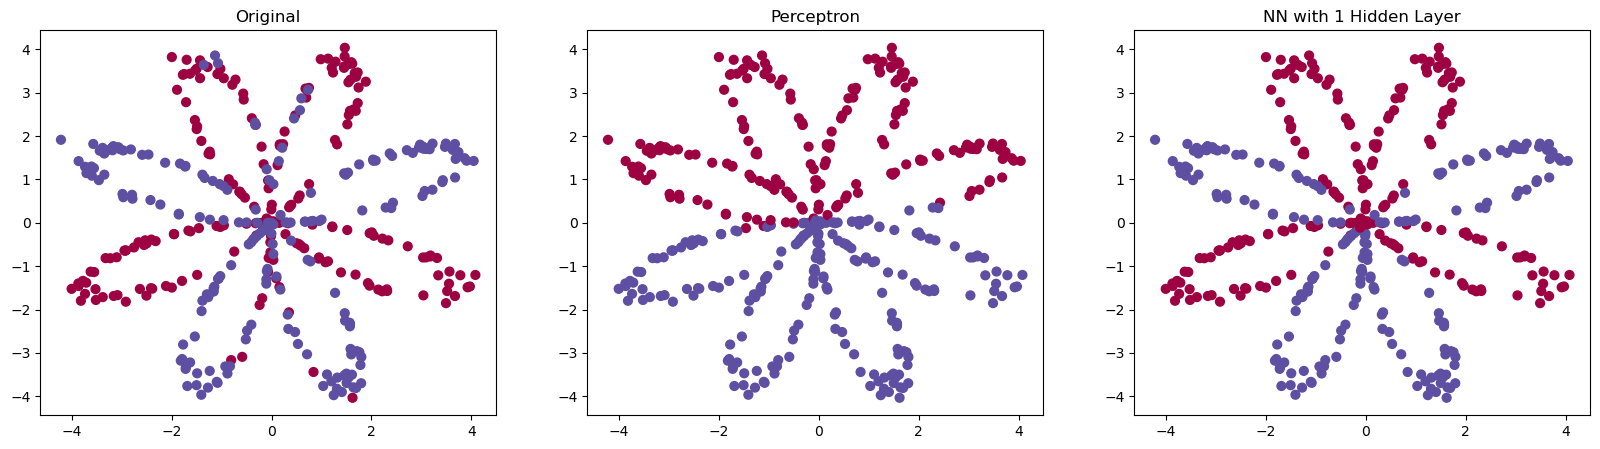

In [82]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

ax1.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);
ax1.set_title("Original")

ax2.scatter(X[0, :], X[1, :], c=d['Y_prediction_train'], s=40, cmap=plt.cm.Spectral); 
ax2.set_title("Perceptron")

ax3.scatter(X[0, :], X[1, :], c=y_hat, s=40, cmap=plt.cm.Spectral); 
ax3.set_title("NN with 1 Hidden Layer");


---

## Part 3. Try to mplement NN with 1 hidden layer to solve Cat/NonCat Problem from previous lesson.

In [92]:
import h5py
import numpy as np

def load_dataset():
    # Load training data
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])  # Train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])  # Train set labels

    # Load test data
    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])  # Test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])  # Test set labels

    # Class labels (cat/non-cat)
    classes = np.array(test_dataset["list_classes"][:])  # List of classes (cat/non-cat)
    
    # Reshape labels to fit (1, number of examples)
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


In [94]:

# Step 1: Load the dataset using the provided function
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

# Step 2: Flatten and normalize the dataset
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

# Normalize the data to have values between 0 and 1
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.


In [96]:
# Train the model with a hidden layer size of 4
parameters = nn_model(train_set_x, train_set_y, n_h=4, num_iterations=10000, print_cost=True)


Cost after iteration 0: 0.692542
Cost after iteration 1000: 0.643974
Cost after iteration 2000: 0.643974
Cost after iteration 3000: 0.643974
Cost after iteration 4000: 0.643974
Cost after iteration 5000: 0.643974
Cost after iteration 6000: 0.643974
Cost after iteration 7000: 0.643974
Cost after iteration 8000: 0.643974
Cost after iteration 9000: 0.643974


In [97]:
# Predict on the training set
predictions_train = predict(parameters, train_set_x)

# Predict on the test set
predictions_test = predict(parameters, test_set_x)

# Print accuracy
print("Train accuracy: {} %".format(100 - np.mean(np.abs(predictions_train - train_set_y)) * 100))
print("Test accuracy: {} %".format(100 - np.mean(np.abs(predictions_test - test_set_y)) * 100))


Train accuracy: 65.55023923444976 %
Test accuracy: 34.0 %


In [98]:
# Example of a custom image (you can replace "cat.jpeg" with your image file)
fname = "cat.jpeg"
image = np.array(Image.open(fname).resize((train_set_x_orig.shape[1], train_set_x_orig.shape[1])))
image = image / 255.  # Normalize
image = image.reshape((1, -1)).T  # Reshape to match the input shape

# Predict and print result
my_predicted_image = predict(parameters, image)
print("Prediction: " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" +
      classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") + "\" picture.")


Prediction: False, your algorithm predicts a "non-cat" picture.
